<a href="https://colab.research.google.com/github/yk-Jeong/nextlab_collabo/blob/main/CP2_%EA%B8%B0%EC%97%85%ED%98%91%EC%97%85_%EB%84%A5%EC%8A%A4%ED%8A%B8%EB%9E%A9(3)_%EB%8B%A8%EB%9D%BD%EC%97%B0%EA%B2%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

######초기 아이디어 메모


**단락 연결 여부 확인 알고리즘**

1) 동일문장 여부 판별(이중분류?) -> 띄어쓰기 없는 경우, 마침표 없는 경우 무조건 동일한 문장일 것. 
<br>
2) 문장간 연결성 파악(응집성 개념 활용?)
<br>

---- 1, 2는 사실상 같은 개념 아닌지? <br>
3) 단락 유사도 파악(코사인 유사도?)

라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np

####3.  단락 유사도 파악

참고: https://wikidocs.net/76349

---



In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
X_data = np.array(['캐나다 리신 판 감독의 ‘집으로 가는 기차’(Last Train Home)가 제7회 EBS국제멘터리영화제의 대상으로 선정됐다. 리신 판 감독은 지난 28일 EBS 스페이스홀에서 열린 ‘제7회 EBS국제다큐영화제’ 시상식에서, 총 12편의 경쟁작을 물리치고 당당하게 대상 트로피를 거머쥐었다. 페페 단크바르트 심사위원장은 “뛰어난 연출력과 함께 스토리가 돋보였다. 느리지만 효과적인 방법으로 현대의 사회적, 경제적 문제를 지적한다”라며 “관객들 역시 중국 이주 노동자들의 고난과 어려움, 그리고 노동의 결과가 지구 반대편의 사람들이 편안한 삶을 영위하는데 어떤 도움을 주는지에 대해 공감할 수 있을 것”이라고 대상 선정 배경을 설명했다. ',
'리신 판 감독은 “오늘도 공장에서 힘들게 일하는 이주노동자 뿐 아니라 3년이 넘는 기간 동안 저와 우리 모두를 위해 진실한 모습을 보여준 주인공 가족에게 감사하다”며 “다음에 더 좋은 작품으로 찾아뵙겠다”고 수상 소감을 밝혔다. ‘집으로 가는 기차’는 중국공장노동자인 장의 가족이 겪는 갈등과 소통의 문제에 대해 다룬 작품이다. 한편 ‘다큐멘터리 정신상’은 야크 킬미 감독의 ‘디스코와 핵전쟁’에게 돌아갔다. 또 ‘심사위원 특별상’은 크리스티안 프라이 감독의 ‘스페이스 투어리스트’가 받았다. 올해 신설된 ‘UNICEF 특별상’은 이승준 감독의 ‘달팽이의 별’에게 돌아갔다.‘달팽이의 별’은 시청자 특별심사단의 평가와 온라인, 극장 별점 평가로 선정하는 ‘시청자상’도 수상했다.', 
'공민왕이 격정의 시기에 어느 누구한테도 마음을 열 수 없는 상태에서 호위무사 홍림과의 관계, 홍림에 대한 애정, 왕의 호위무사로서의 홍림, 왕의 명령을 거역할 수 없어 왕비와 합궁을 해야만 하는 홍림, 왕비이면서도 왕과 홍림 사이에 끼어 들 수 없던 왕비, 지아비가 아닌 홍림과 합궁을 할 수 밖에 없었던 비운의 왕비. 이 세사람의 거역할 수 없는 운명에 마음이 아팠다.인간적인 고뇌, 원하지 않으면서도 거역할 수 없는 비운에 가슴이 저렸고, 합궁 이후 인간으로서의 욕망에 눈뜨면서 벌어지는 비극에 다시 한 번 가슴이 저며왔다.공민왕의 비장한 얼굴 표정이나 사랑했던 홍림에게 배신을 당하고 홍림을 찾아 광기를 부리는 공민왕의 모습이나 사랑하게 된 홍림을 찾아으면서도 왕비로서의 위엄있는 모습을 지키면서도 홍림과 서로 사랑하는 모습에서는 영화 속에 녹아들어 오버연기나 군더더기 모습은 별로 보이지 않는다.요즘 여러 영화에서 수위 높은 노출신으로 왈가왈부중이지만 쌍화점에선 그리 추해보이지 않는 것은 감독의 수준높은 연출 때문일까?연기자들의 눈부신 연기력때문일까?'])

In [ ]:
twitter = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
for i, document in enumerate(X_data):
  nouns = twitter.nouns(document)
  X_data[i] = ' '.join(nouns) #space 필요

In [ ]:
print(X_data)

['캐나다 리신 판 감독 집 기차 제 국제 터리 영화제 대상 선정 리신 판 감독 지난 스페이스 홀 제 국제 다큐 영화제 시상식 총 편의 경쟁 작 물리 대상 트로피 거머 페페 단 바르트 심사 위원장 연출 스토리 효과 방법 현대 사회 경제 문제 지적 라며 관객 역시 중국 이주 노동자 고난 어려움 노동 결과 지구 반대편 사람 삶 영위 도움 대해 공감 수 것 대상 선정 배경 설명'
 '리신 판 감독 오늘 공장 일 이주 노동자 뿐 기간 동안 저 우리 모두 위해 모습 주인공 가족 며 다음 더 작품 고 수상 소감 집 기차 중국 공장 노동자 장의 가족 갈등 소통 문제 대해 작품 한편 다큐멘터리 정신 은 야크 킬미 감독 디스코 핵전쟁 또 심사 위원 특별상 은 크리스 티안 프라이 감독 스페이스 투어리스트 올해 신설 특별상 은 이승준 감독 달팽이 별 달팽이 별 은 시청자 특별심사 단 평가 온라인 극장 점 평가 선정 시청자 도'
 '공민왕 격정 시기 누구 도 마음 열 수 상태 호위 무사 홍림 관계 홍림 대한 애정 왕 호위 무사 로서 홍림 왕 명령 거 역할 수 왕비 합궁 홍림 왕비 왕 홍림 사이 수 왕비 지아비 홍림 합궁 수 비운 왕비 이 사람 거 역할 수 운명 마음 인간 고뇌 거 역할 수 비운 가슴 합궁 이후 인간 욕망 비극 다시 번 가슴 며 공민왕 얼굴 표정 사랑 홍림 배신 홍림 광기 공민왕 모습 사랑 홍림 왕비 로서 위엄 모습 홍림 서로 사랑 모습 영화 속 오버 연기 군더더기 모습 별로 보이지 요즘 여러 영화 수위 노 출신 왈가 왈부 쌍화점 보이지 것 감독 수준 연출 때문 연기자 연기력 때문']


In [ ]:
vect = TfidfVectorizer()

In [ ]:
X_data = vect.fit_transform(X_data)

In [ ]:
print(X_data)

  (0, 63)	0.12618208658162253
  (0, 50)	0.12618208658162253
  (0, 11)	0.12618208658162253
  (0, 32)	0.09596472924579345
  (0, 33)	0.12618208658162253
  (0, 88)	0.12618208658162253
  (0, 56)	0.09596472924579345
  (0, 48)	0.12618208658162253
  (0, 115)	0.12618208658162253
  (0, 6)	0.12618208658162253
  (0, 22)	0.12618208658162253
  (0, 79)	0.12618208658162253
  (0, 9)	0.12618208658162253
  (0, 23)	0.09596472924579345
  (0, 107)	0.09596472924579345
  (0, 114)	0.09596472924579345
  (0, 82)	0.12618208658162253
  (0, 14)	0.12618208658162253
  (0, 37)	0.12618208658162253
  (0, 118)	0.12618208658162253
  (0, 45)	0.09596472924579345
  (0, 8)	0.12618208658162253
  (0, 59)	0.12618208658162253
  (0, 137)	0.12618208658162253
  (0, 49)	0.12618208658162253
  :	:
  (2, 101)	0.06353080940225472
  (2, 55)	0.12706161880450945
  (2, 117)	0.06353080940225472
  (2, 58)	0.06353080940225472
  (2, 135)	0.19059242820676417
  (2, 97)	0.3176540470112736
  (2, 83)	0.19059242820676417
  (2, 41)	0.06353080940225472


In [ ]:
cosine_similarity_matrix = (X_data * X_data.T)
print(cosine_similarity_matrix.shape)

(3, 3)


In [ ]:
print(cosine_similarity_matrix)

  (0, 2)	0.01486613543111886
  (0, 1)	0.1525964696702627
  (0, 0)	1.0
  (1, 0)	0.1525964696702627
  (1, 2)	0.027639259946878603
  (1, 1)	1.0000000000000002
  (2, 0)	0.01486613543111886
  (2, 1)	0.027639259946878603
  (2, 2)	0.9999999999999998


In [ ]:
print(cosine_similarity_matrix.toarray())

[[1.         0.15259647 0.01486614]
 [0.15259647 1.         0.02763926]
 [0.01486614 0.02763926 1.        ]]


시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

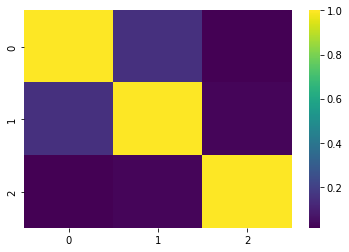

In [ ]:
sns.heatmap(cosine_similarity_matrix.toarray(), cmap = 'viridis')
plt.show()

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [ ]:
def cos_sim(A, B):
  return dot(A, B) / norm(A) * norm(B)

In [ ]:
cosine_similarity_matrix.toarray()

array([[1.        , 0.15259647, 0.01486614],
       [0.15259647, 1.        , 0.02763926],
       [0.01486614, 0.02763926, 1.        ]])

In [ ]:
cosine_similarity_matrix.toarray()[0], cosine_similarity_matrix.toarray()[1], cosine_similarity_matrix.toarray()[2]

(array([1.        , 0.15259647, 0.01486614]),
 array([0.15259647, 1.        , 0.02763926]),
 array([0.01486614, 0.02763926, 1.        ]))

In [ ]:
print(cos_sim(cosine_similarity_matrix.toarray()[0], cosine_similarity_matrix.toarray()[1]))

0.3056848724839579


In [ ]:
print(cos_sim(cosine_similarity_matrix.toarray()[1], cosine_similarity_matrix.toarray()[2]))

0.056895282593517685


In [ ]:
print(cos_sim(cosine_similarity_matrix.toarray()[0], cosine_similarity_matrix.toarray()[2]))

0.033574321047904816
